# Models using all variables

In [54]:
import pandas as pd

X_train_std = pd.read_csv("./preprocessed_datasets/X_train_std.csv")
X_test_std = pd.read_csv("./preprocessed_datasets/X_test_std.csv")
y_train = pd.read_csv("./preprocessed_datasets/y_train.csv")
y_test = pd.read_csv("./preprocessed_datasets/y_test.csv")

Y values to array

In [55]:
import numpy as np

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Lineal regression models

In [56]:
X_train_std = X_train_std.drop(["index", "ID_Zenodo"], axis=1)

X_test_std = X_test_std.drop(["index", "ID_Zenodo"], axis=1)

### Lineal Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression(fit_intercept=True).fit(X_train_std ,y_train)
lr_r2_train = r2_score(y_train, lr.predict(X_train_std))
lr_r2_val = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='r2').mean()
lr_r2_test = r2_score(y_test, lr.predict(X_test_std))

In [74]:
print(f"R2 train: {lr_r2_train}")
print(f"R2 val: {lr_r2_val}")
print(f"R2 test: {lr_r2_test}")

R2 train: 0.27350592069496404
R2 val: -4.270428741079507e+24
R2 test: 0.21792818941801317


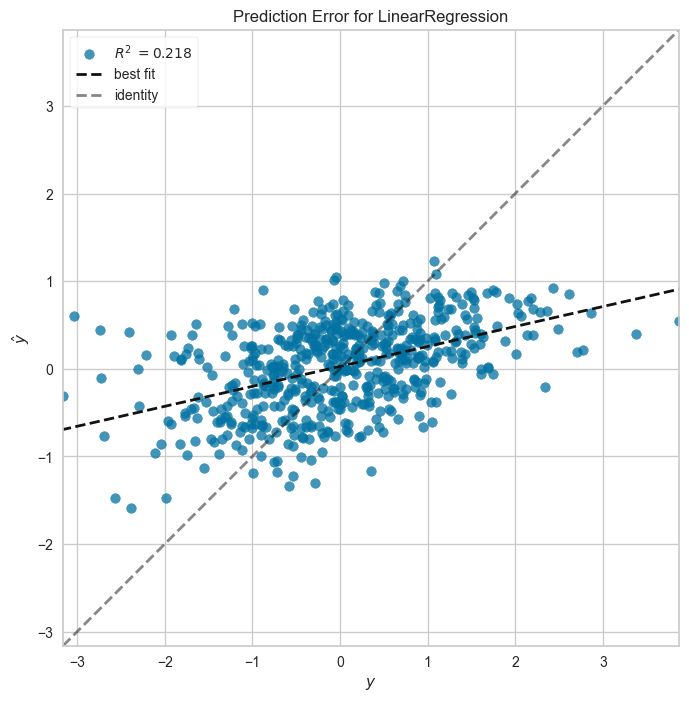

In [59]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test_std, y_test, is_fitted=True)

### Ridge Regression

In [60]:
from sklearn.model_selection import cross_val_score
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alpha, scoring="r2", cv=5).fit(X_train_std, y_train)
ridge_r2_test= ridge_cv.score(X_test_std, y_test)
ridge_r2_val = ridge_cv.best_score_
ridge_r2_val2 = np.mean(cross_val_score( RidgeCV(alphas=alpha, scoring="r2", cv=5), X_train_std, y_train, scoring="r2" ))
ridge_r2_train= ridge_cv.score(X_train_std, y_train)

print("Train R2: ", ridge_r2_train)
print("Validation R2: ", ridge_r2_val)
print("Validation R2: ", ridge_r2_val2)

print("Test R2: ", ridge_r2_test)
print(ridge_cv.alpha_)

Train R2:  0.27417151890911196
Validation R2:  0.23423886682480602
Validation R2:  0.23423886682480602
Test R2:  0.21910185810671856
1.0


### Lasso Regression

In [61]:
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, alphas=alpha).fit(X_train_std, y_train)
lasso_r2_test= lasso_cv.score(X_test_std, y_test)
lasso_r2_val = np.mean(cross_val_score( LassoCV(alphas=alpha, random_state=0, cv=5), X_train_std, y_train, scoring="r2" ))
lasso_r2_train= lasso_cv.score(X_train_std, y_train)

print("Train R2: ", lasso_r2_train)
print("Validation R2: ", lasso_r2_val)
print("Test R2: ", lasso_r2_test)
print(lasso_cv.alpha_)

Train R2:  0.2699338805722008
Validation R2:  0.23455361457833912
Test R2:  0.21641514858959998
0.001


In [62]:
r2_results = pd.DataFrame({'LR': lr_r2_train, 'Ridge': ridge_r2_train, 'Lasso': lasso_r2_train,}, index=['Train R2'])


print([lr_r2_val, ridge_r2_val, lasso_r2_val])
lr_r2_val = np.mean(lr_r2_val)
r2_results.loc['CV (Val) R2', :] = [lr_r2_val, ridge_r2_val, lasso_r2_val]
r2_results.loc['Test R2', :] = [lr_r2_test, ridge_r2_test, lasso_r2_test]


r2_results.loc['lambda','LR']=0
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','Lasso']=lasso_cv.alpha_
r2_results


[-4.270428741079507e+24, 0.23423886682480602, 0.23455361457833912]


,LR,Ridge,Lasso
Train R2,2.735059e-01,0.274172,0.269934
CV (Val) R2,-4.270429e+24,0.234239,0.234554
Test R2,2.179282e-01,0.219102,0.216415
lambda,0.000000e+00,1.000000,0.001000


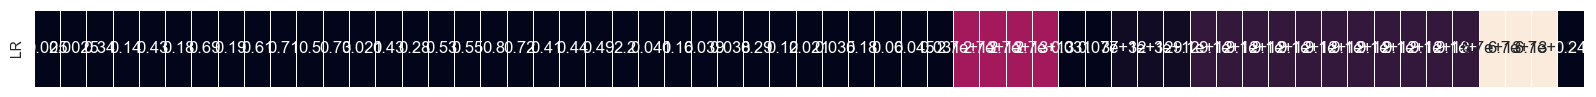

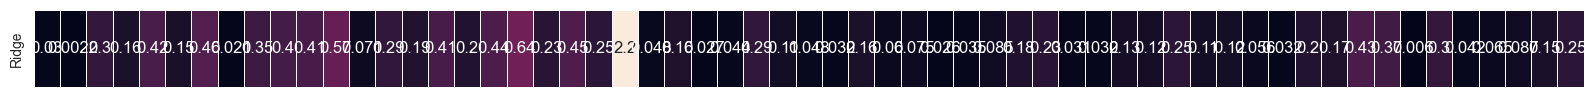

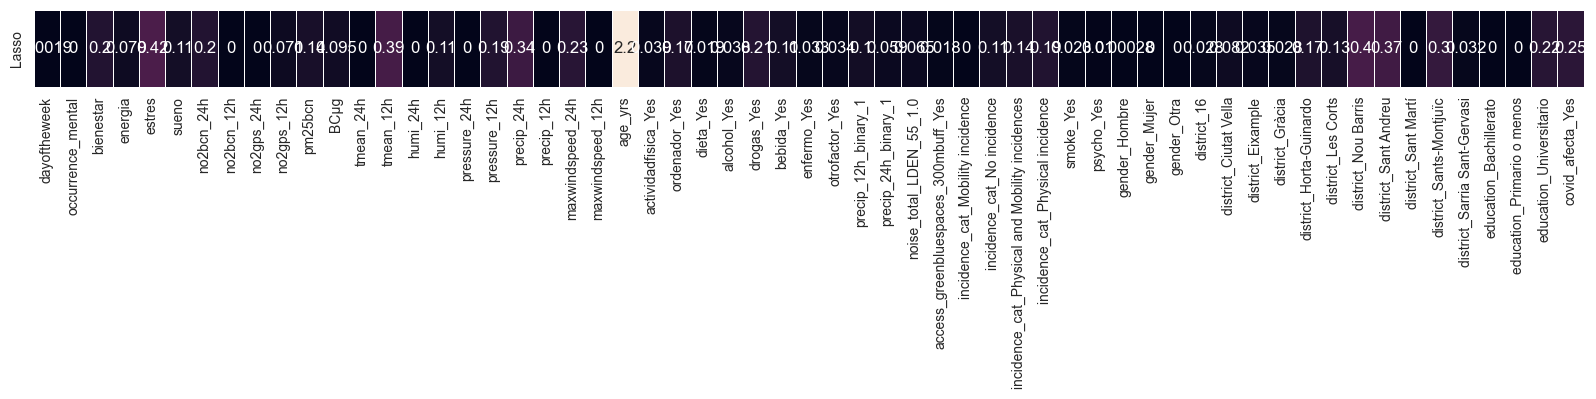

In [63]:

import matplotlib.pyplot as plt
import seaborn as sns

weights = pd.DataFrame({'LR':lr.coef_, 'Ridge':ridge_cv.coef_, 'Lasso':lasso_cv.coef_},index=X_train_std.columns)

fig, ax = plt.subplots(figsize = (20,1))
sns.heatmap(weights.T.loc[['LR'],:].abs(), annot=True, linewidths=.5, ax=ax, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Ridge'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Lasso'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=True);

# MLP (Multi Layer Perceptron)

In [64]:
X_train_std_old = X_train_std.copy()
X_test_std_old = X_test_std.copy()

In [65]:

X_train_std = X_train_std.drop(['district_16',
       'district_Ciutat Vella', 'district_Eixample', 'district_Gràcia',
       'district_Horta-Guinardo', 'district_Les Corts', 'district_Nou Barris',
       'district_Sant Andreu', 'district_Sant Martí',
       'district_Sants-Montjuïc', 'district_Sarria Sant-Gervasi',
       'education_Bachillerato', 'education_Primario o menos',
       'education_Universitario', 'covid_afecta_Yes'], axis=1)
X_test_std = X_test_std.drop(['district_16',
       'district_Ciutat Vella', 'district_Eixample', 'district_Gràcia',
       'district_Horta-Guinardo', 'district_Les Corts', 'district_Nou Barris',
       'district_Sant Andreu', 'district_Sant Martí',
       'district_Sants-Montjuïc', 'district_Sarria Sant-Gervasi',
       'education_Bachillerato', 'education_Primario o menos',
       'education_Universitario', 'covid_afecta_Yes'], axis=1)

In [72]:
X_train_std = X_train_std_old.copy()
X_test_std = X_test_std_old.copy()

In [76]:
X_train_std.head()

,dayoftheweek,occurrence_mental,bienestar,energia,estres,sueno,no2bcn_24h,no2bcn_12h,no2gps_24h,no2gps_12h,...,district_Les Corts,district_Nou Barris,district_Sant Andreu,district_Sant Martí,district_Sants-Montjuïc,district_Sarria Sant-Gervasi,education_Bachillerato,education_Primario o menos,education_Universitario,covid_afecta_Yes
0,0.000000,0.615385,0.7,0.7,0.1,0.7,0.165778,0.078937,0.218343,0.188880,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.500000,0.000000,0.9,0.8,0.2,0.7,0.414397,0.223706,0.431743,0.188105,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.333333,0.846154,0.6,0.4,0.6,0.8,0.545388,0.404278,0.493568,0.382044,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.333333,0.307692,0.7,0.8,0.7,0.7,0.235035,0.181878,0.290715,0.243421,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.166667,0.615385,0.9,0.8,0.1,1.0,0.341843,0.334560,0.396636,0.399504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## First iteration

In [122]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

callback = EarlyStopping(monitor='loss',patience=3)

model = Sequential([
    Dense(256, activation='elu', input_shape=(X_train_std.shape[1],)),
    Dense(1)
])
# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error',patience=15)

# Train the model
num_epochs = 1000
batch_size = 32
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))



C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9372 - mean_squared_error: 0.9372 - val_loss: 0.7655 - val_mean_squared_error: 0.7655
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8178 - mean_squared_error: 0.8178 - val_loss: 0.7581 - val_mean_squared_error: 0.7581
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7581 - mean_squared_error: 0.7581 - val_loss: 0.7115 - val_mean_squared_error: 0.7115
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7621 - mean_squared_error: 0.7621 - val_loss: 0.6876 - val_mean_squared_error: 0.6876
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7309 - mean_squared_error: 0.7309 - val_loss: 0.7011 - val_mean_squared_error: 0.7011
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7530 - mean_squared_error: 0.7530 - val_loss: 0.6918 - val_mean_squared_error: 0.6918
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7541 - mean_squared_error: 0.7541 - val_loss: 0.68

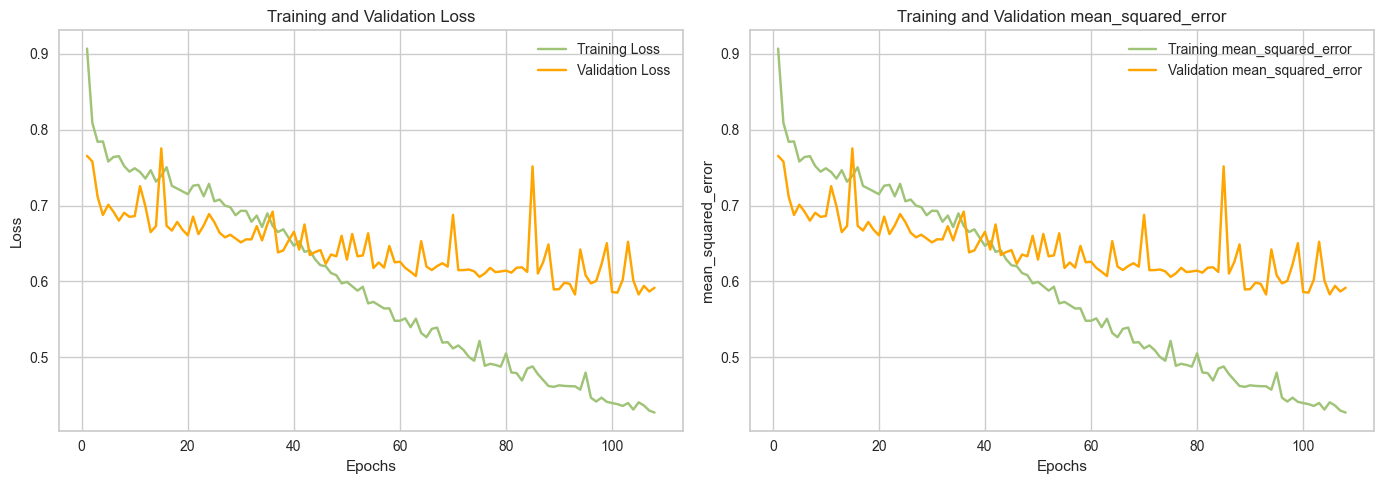

In [123]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

## Second iteration

In [128]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Define the model
model = Sequential([
    Dense(256, activation='leaky_relu', input_shape=(X_train_std.shape[1],)),
    BatchNormalization(),  # Add Batch Normalization
    Dropout(0.5),           # Add Dropout for regularization
    Dense(128, activation='relu'),  # Add another hidden layer
    BatchNormalization(),  # Batch Normalization after the second hidden layer
    Dense(64, activation='relu'),   # Add another hidden layer
    Dense(1)               # Output layer
])

# Define the optimizer with momentum
learning_rate = 0.001
momentum = 0.95
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error', patience=15)

# Train the model
num_epochs = 1000
batch_size = 64  # Adjusted batch size
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.6593 - mean_squared_error: 1.6593 - val_loss: 0.9318 - val_mean_squared_error: 0.9318
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1144 - mean_squared_error: 1.1144 - val_loss: 0.9253 - val_mean_squared_error: 0.9253
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8386 - mean_squared_error: 0.8386 - val_loss: 0.9297 - val_mean_squared_error: 0.9297
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8202 - mean_squared_error: 0.8202 - val_loss: 0.9202 - val_mean_squared_error: 0.9202
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7769 - mean_squared_error: 0.7769 - val_loss: 0.9093 - val_mean_squared_error: 0.9093
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7748 - mean_squared_error: 0.7748 - val_loss: 0.8769 - val_mean_squared_error: 0.8769
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7627 - mean_squared_error: 0.7627 - val_loss: 0.8

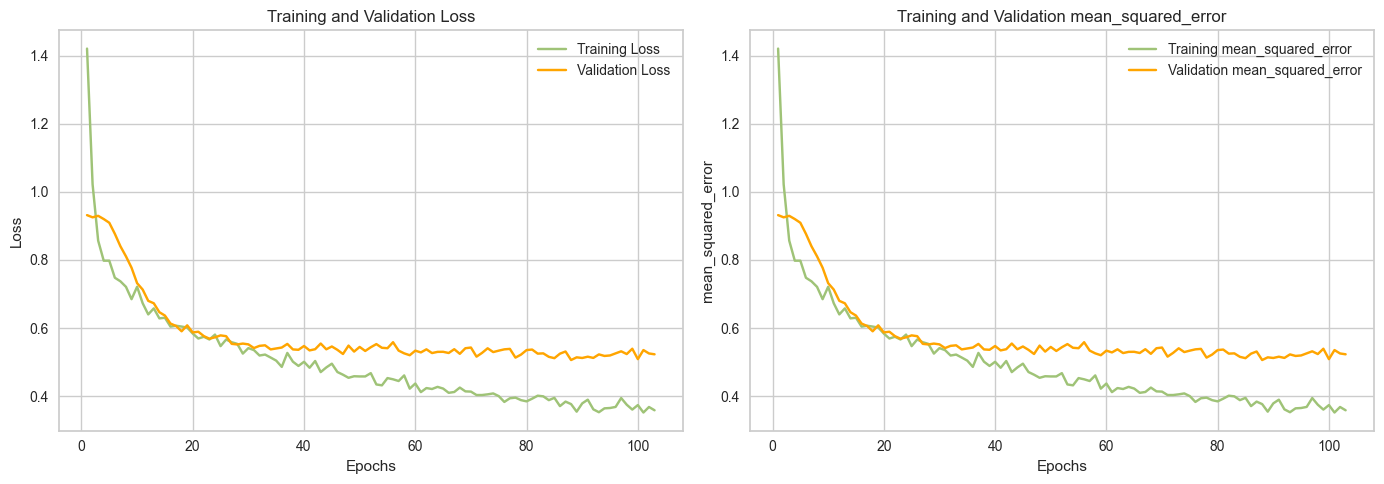

In [129]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

## Third iteration

In [136]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the model
model = Sequential([
    Dense(256, activation='leaky_relu', input_shape=(X_train_std.shape[1],)),
    BatchNormalization(),  # Add Batch Normalization
    Dropout(0.7),           # Add Dropout for regularization
    Dense(128, activation='relu'),  # Add another hidden layer
    BatchNormalization(),  # Batch Normalization after the second hidden layer
    Dense(64, activation='relu'),   # Add another hidden layer
    Dense(1)               # Output layer
])

# Define the optimizer with momentum
learning_rate = 0.001
momentum = 0.98
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

# Use Huber loss as the loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Compile the model with Huber loss
model.compile(optimizer=optimizer, loss=huber_loss, metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error', patience=40)

# Train the model
num_epochs = 1000
batch_size = 64  # Adjusted batch size
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))


Epoch 1/1000


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.7518 - mean_squared_error: 2.1447 - val_loss: 0.4066 - val_mean_squared_error: 0.9508
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5905 - mean_squared_error: 1.5216 - val_loss: 0.4050 - val_mean_squared_error: 0.9575
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4758 - mean_squared_error: 1.1798 - val_loss: 0.3902 - val_mean_squared_error: 0.9122
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4269 - mean_squared_error: 1.0202 - val_loss: 0.4068 - val_mean_squared_error: 0.9658
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3928 - mean_squared_error: 0.9273 - val_loss: 0.3846 - val_mean_squared_error: 0.8978
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3738 - mean_squared_error: 0.8964 - val_loss: 0.3832 - val_mean_squared_error: 0.8959
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3842 - mean_squared_error: 0.9393 - val_loss: 0.3768 - val_mea

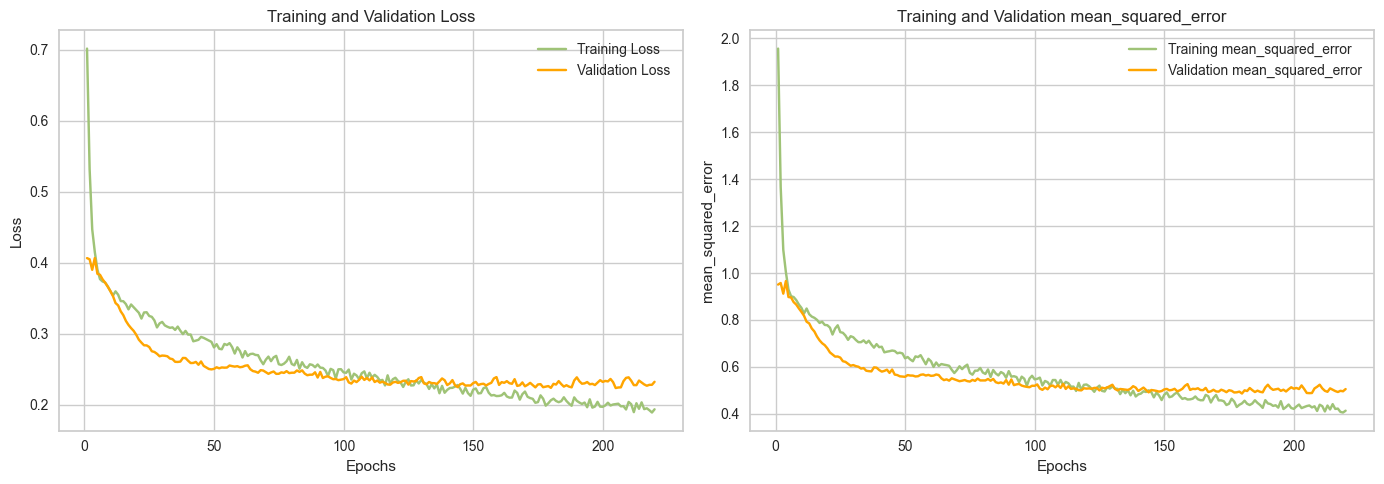

In [137]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

## Fourth iteration

In [167]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers

# Define the model
model = Sequential([
    Dense(300, activation='leaky_relu', input_shape=(X_train_std.shape[1],),kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),  # Add Batch Normalization
    Dropout(0.5),           # Add Dropout for regularization
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # Add another hidden layer
    BatchNormalization(),  # Batch Normalization after the second hidden layer
    Dense(75, activation='relu'),   # Add another hidden layer
    Dense(1)               # Output layer
])

# Define the optimizer with momentum
learning_rate = 0.01
momentum = 0.90
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

# Use Huber loss as the loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Compile the model with Huber loss
model.compile(optimizer=optimizer, loss="huber", metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error', patience=40)

# Train the model
num_epochs = 1000
batch_size = 256  # Adjusted batch size
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.6135 - mean_squared_error: 1.7079 - val_loss: 1.3753 - val_mean_squared_error: 0.9409
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5092 - mean_squared_error: 1.3962 - val_loss: 1.3528 - val_mean_squared_error: 0.9381
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4048 - mean_squared_error: 1.1224 - val_loss: 1.3302 - val_mean_squared_error: 0.9474
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3457 - mean_squared_error: 1.0354 - val_loss: 1.3038 - val_mean_squared_error: 0.9504
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3041 - mean_squared_error: 1.0021 - val_loss: 1.2766 - val_mean_squared_error: 0.9512
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2500 - mean_squared_error: 0.9268 - val_loss: 1.2509 - val_mean_squared_error: 0.9545
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2423 - mean_squared_error: 1.0050 - val_loss: 1.2242 - va

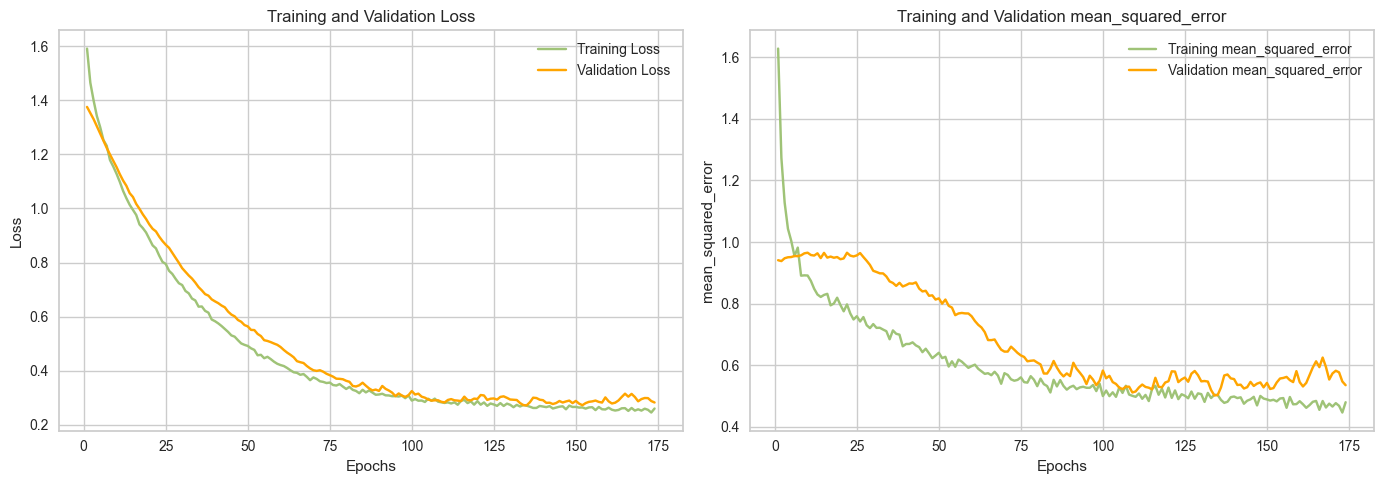

In [168]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

### Utilitzant MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

0.03882599941381937